<a href="https://colab.research.google.com/github/pedrob22/uas_bengkod/blob/main/UAS_PEDRO_13842.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas # Install the pandas library
import pandas as pd # Import pandas and give it the alias 'pd'

# **Update the file_path to the correct file name.**
file_path = '/content/water_potability.csv'  # Corrected the file name.


water_data = pd.read_csv(file_path) # Use the 'file_path' variable to specify the file location

water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
# Select the desired columns for analysis
selected_columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                   'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
selected_data = water_data[selected_columns]

# Display information about the dataset
print("Informasi Dataset:")
selected_data.info() # Display a concise summary of the DataFrame

print("\nStatistik Deskriptif:")
print(selected_data.describe()) # Display descriptive statistics of the DataFrame

print("\nNilai Unik Tiap Kolom:")
for column in selected_columns:
  unique_values = selected_data[column].unique()
  print(f"- {column}: {unique_values[:min(len(unique_values), 20)]} {'...' if len(unique_values) > 20 else ''}") # Display up to 20 unique values, and "..." if there are more

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB

Statistik Deskriptif:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    

Jumlah Missing Values per Kolom:
 ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


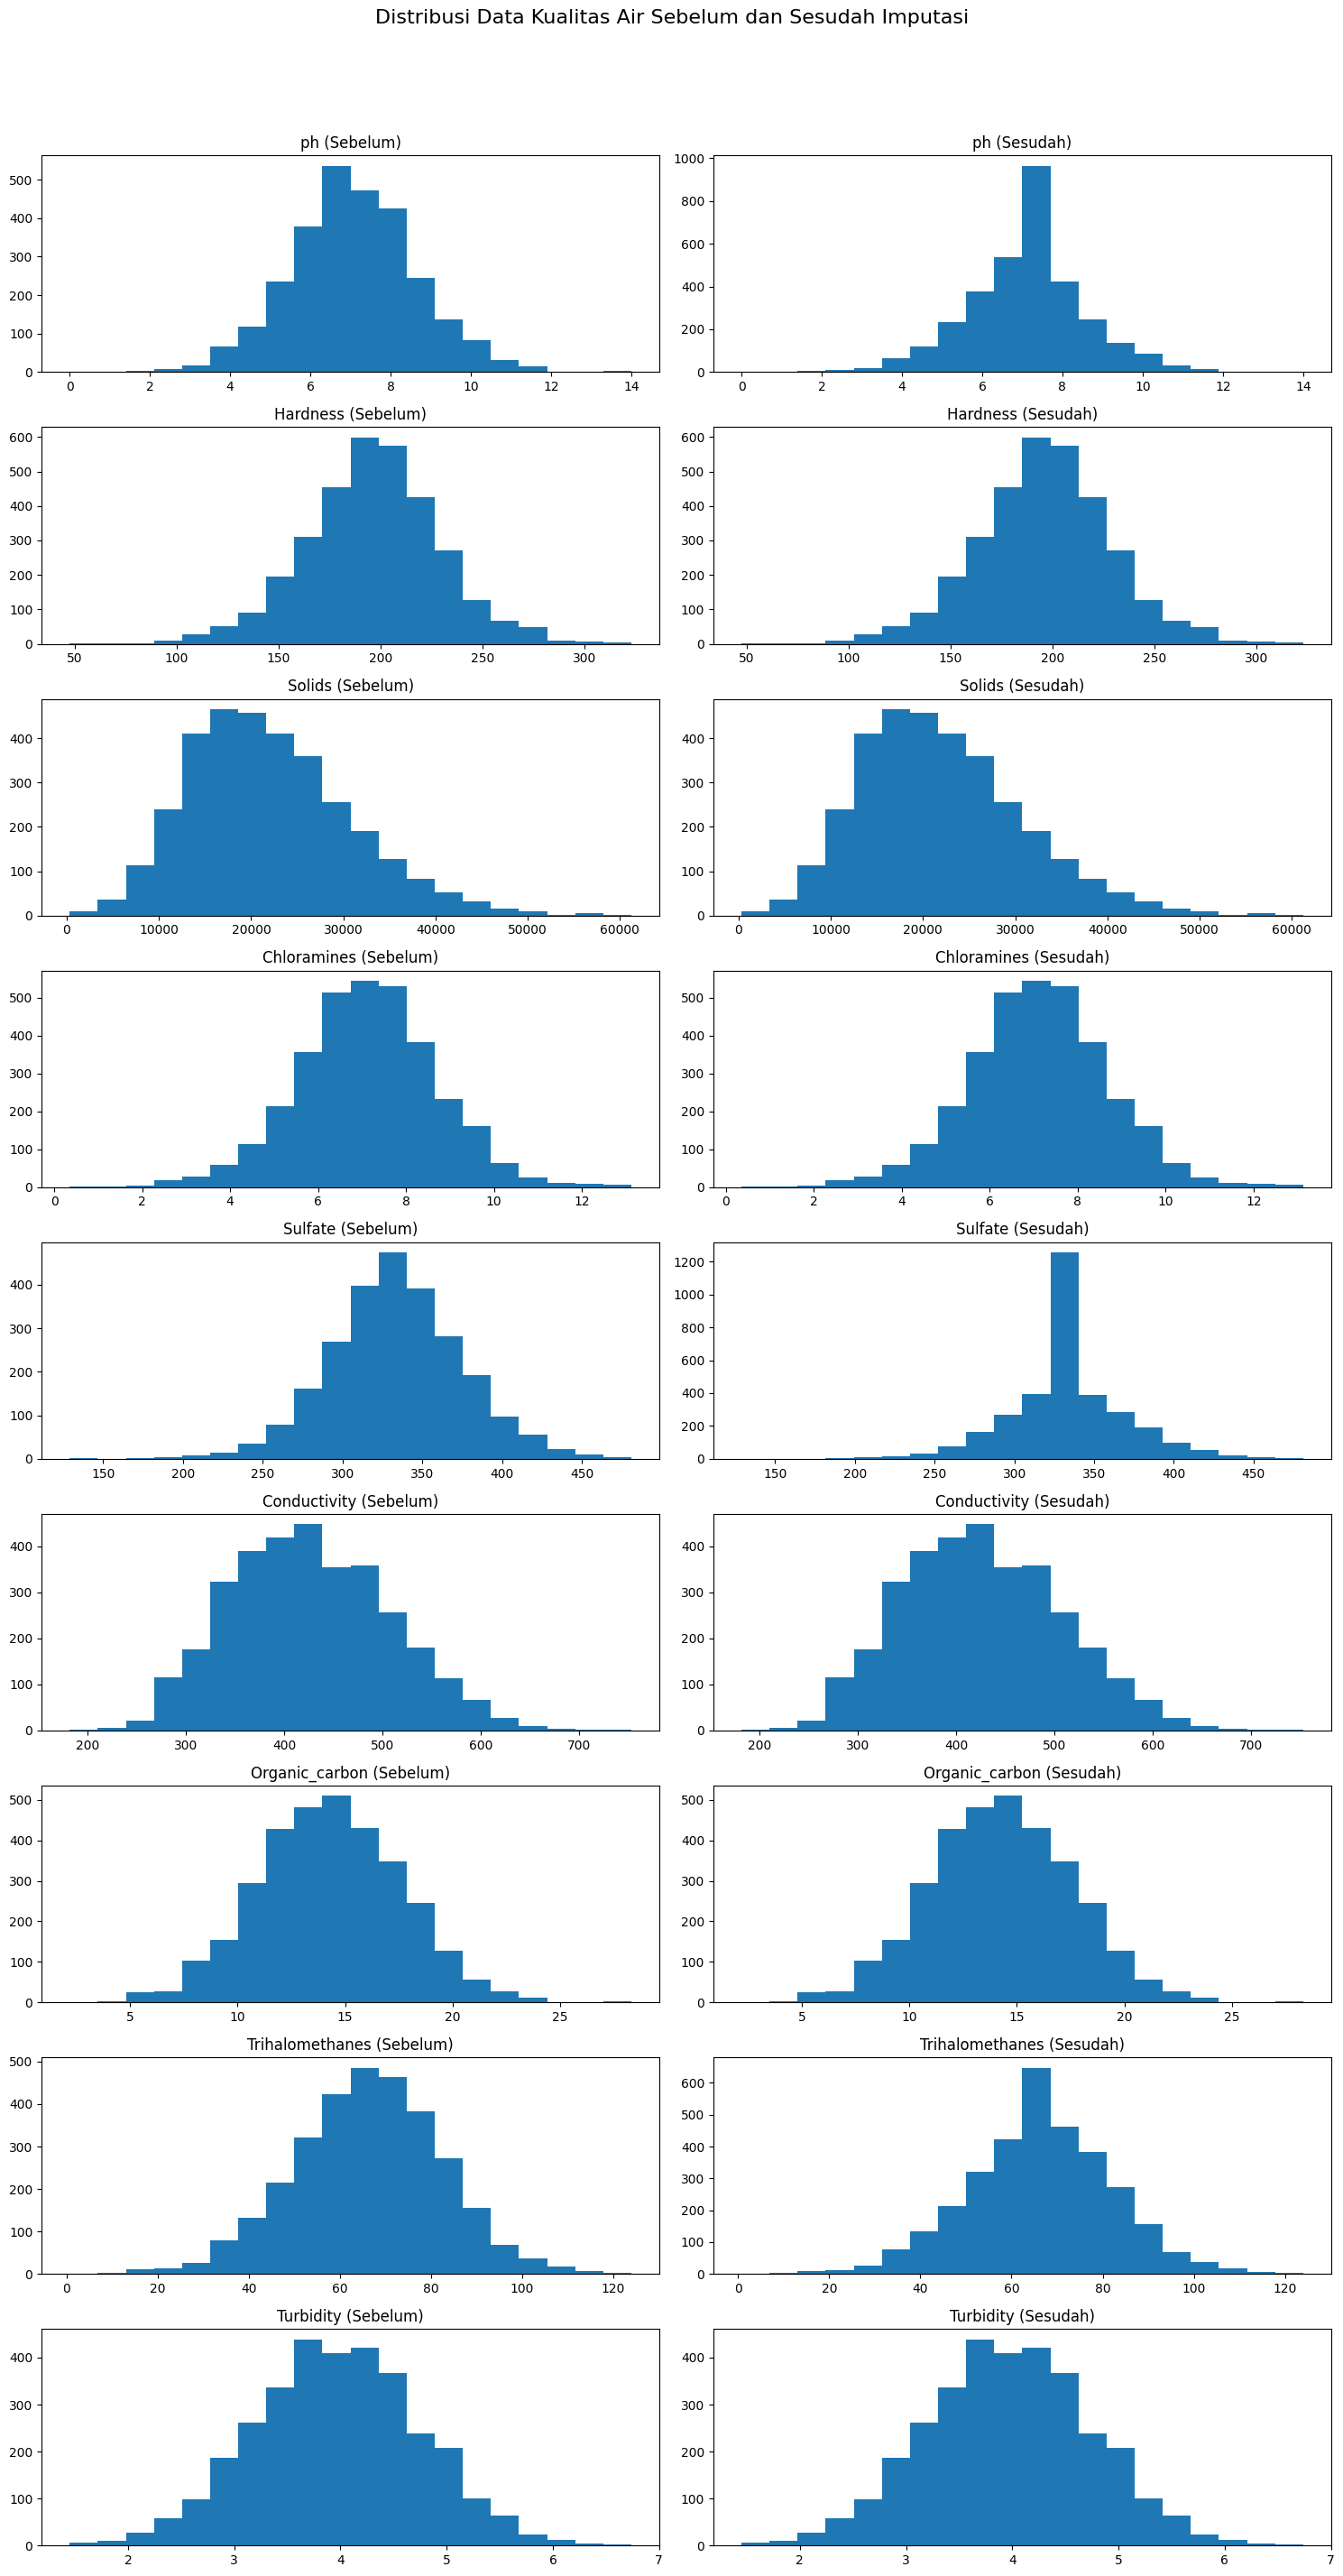

In [ ]:



import matplotlib.pyplot as plt


# **Update the file_path to the correct file name.**
file_path = '/content/water_potability.csv'  # Corrected the file name.

water_data = pd.read_csv(file_path) # Read the data from the CSV file

# Select the desired columns for analysis
selected_columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                   'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
selected_data = water_data[selected_columns]

# --- 1. Cek Missing Values dan Outlier ---
print("Jumlah Missing Values per Kolom:\n", selected_data.isnull().sum())

# --- 2. Imputasi dengan Mean ---
for column in selected_columns[:-1]:  # Exclude 'Potability' from imputation
    selected_data[column] = selected_data[column].fillna(selected_data[column].mean())

# --- 3. Visualisasi Distribusi Data ---
fig, axes = plt.subplots(len(selected_columns[:-1]), 2, figsize=(15, 30))
fig.suptitle('Distribusi Data Kualitas Air Sebelum dan Sesudah Imputasi', fontsize=16)

for i, column in enumerate(selected_columns[:-1]):
    # Before imputation
    axes[i, 0].hist(water_data[column], bins=20)
    axes[i, 0].set_title(f'{column} (Sebelum)')

    # After imputation
    axes[i, 1].hist(selected_data[column], bins=20)
    axes[i, 1].set_title(f'{column} (Sesudah)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
!pip install -q pandas scikit-learn matplotlib # Install necessary libraries (quietly)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# **Update the file_path to the correct file name.**
file_path = '/content/water_potability.csv'  # Corrected the file name.

water_data = pd.read_csv(file_path) # Read the data from the CSV file

# --- 1. Persiapan Data ---
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']
target = 'Potability'

X = water_data[features]
y = water_data[target]

# Imputasi missing values (jika masih ada)
X = X.fillna(X.mean())

# --- Scaling Data ---
scaler = StandardScaler()
X = scaler.fit_transform(X) # Scale the features

# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Bangun Model ---
model = LogisticRegression(max_iter=1000) # Increase max_iter
model.fit(X_train, y_train)

# --- 4. Evaluasi Model ---
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report, handling zero division
report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

# Convert the dictionary to a Pandas DataFrame
report_df = pd.DataFrame(report_dict).transpose()

print(f"Akurasi Model: {accuracy}")
print("\nClassification Report:\n")
print(report_df) # Print the DataFrame

Akurasi Model: 0.6280487804878049

Classification Report:

              precision    recall  f1-score     support
0              0.628049  1.000000  0.771536  412.000000
1              1.000000  0.000000  0.000000  244.000000
accuracy       0.628049  0.628049  0.628049    0.628049
macro avg      0.814024  0.500000  0.385768  656.000000
weighted avg   0.766396  0.628049  0.484562  656.000000


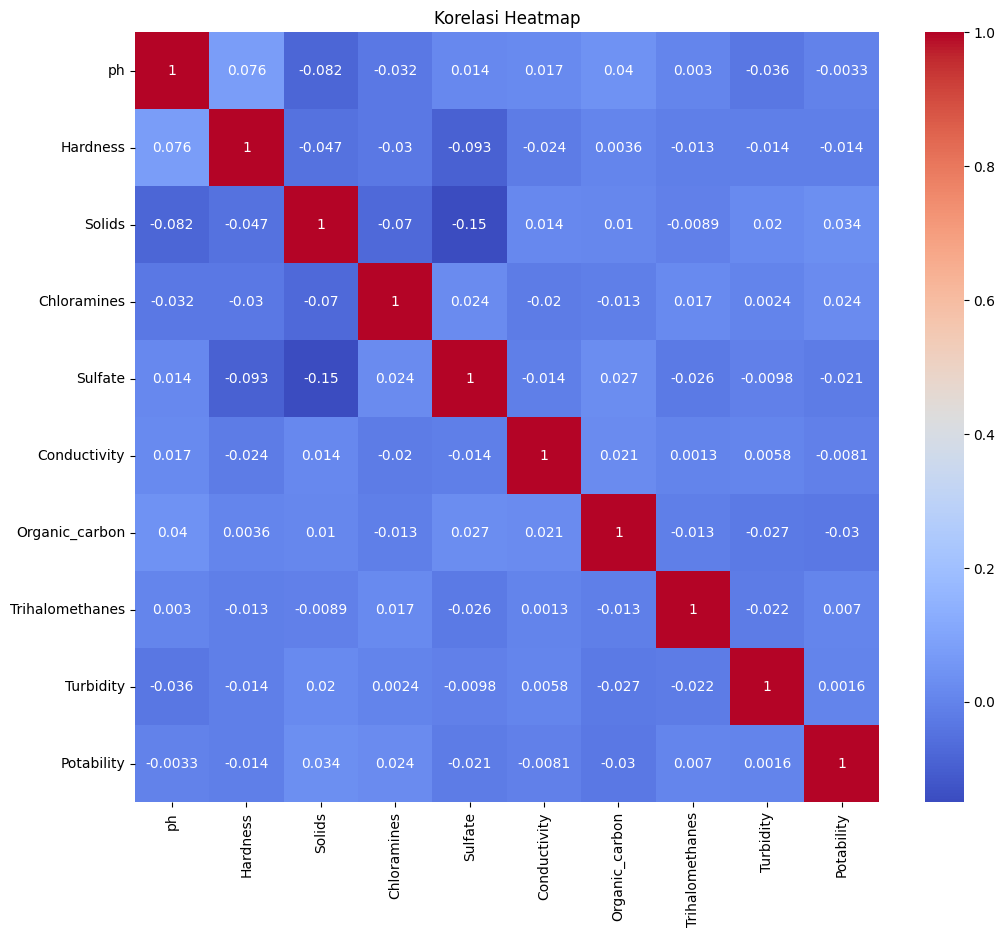

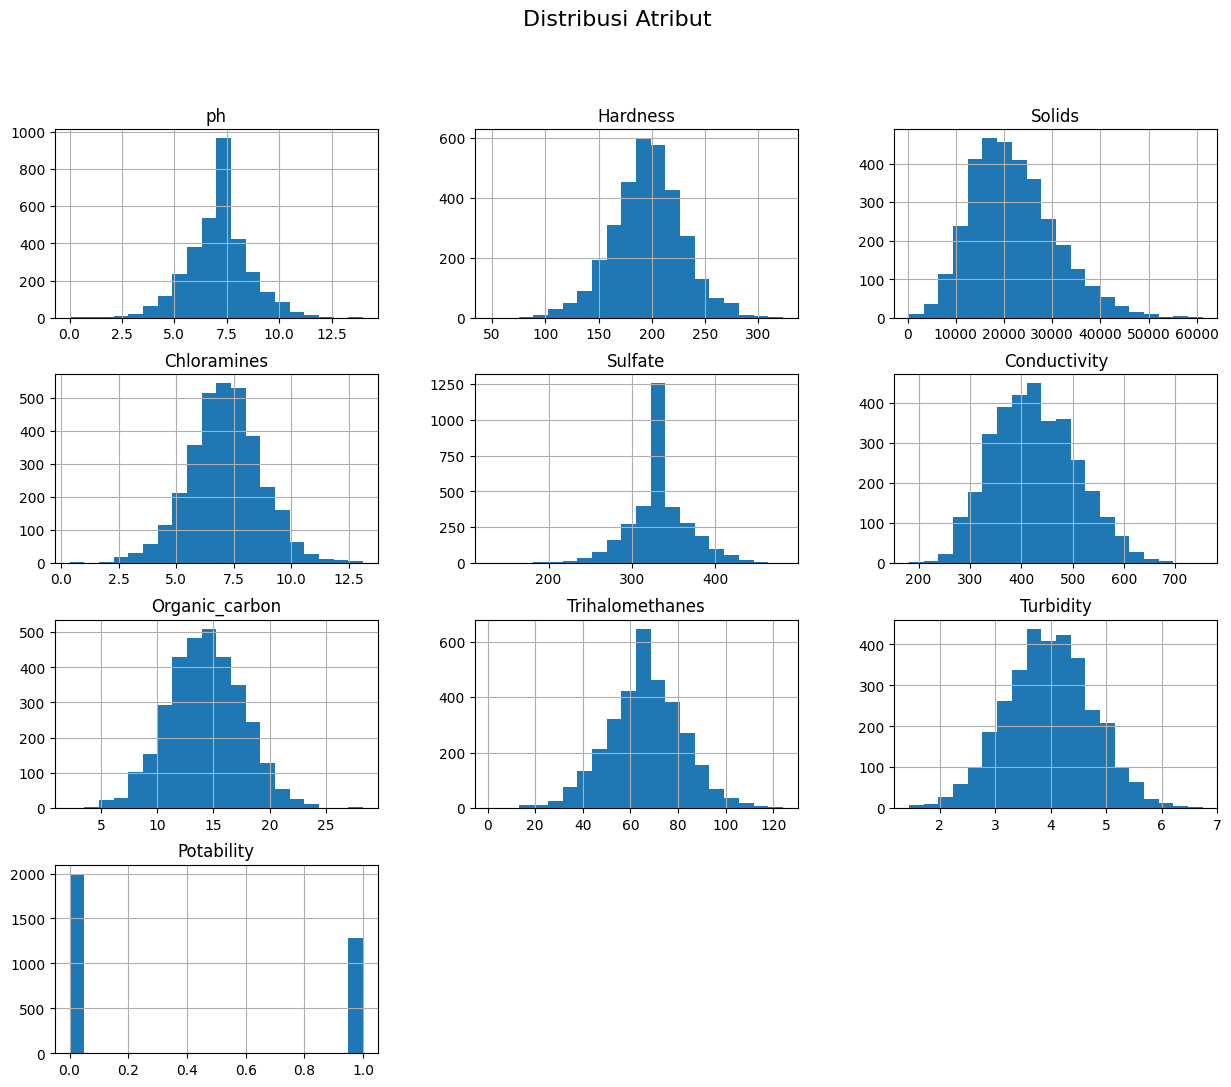

Akurasi Model: 0.6280487804878049

Classification Report:

              precision    recall  f1-score     support
0              0.628049  1.000000  0.771536  412.000000
1              1.000000  0.000000  0.000000  244.000000
accuracy       0.628049  0.628049  0.628049    0.628049
macro avg      0.814024  0.500000  0.385768  656.000000
weighted avg   0.766396  0.628049  0.484562  656.000000


In [ ]:
!pip install -q pandas scikit-learn matplotlib seaborn # Install necessary libraries (quietly)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# **Update the file_path to the correct file name.**
file_path = '/content/water_potability.csv'  # Corrected the file name.

water_data = pd.read_csv(file_path) # Read the data from the CSV file

# --- 1. Pembersihan Data & Visualisasi ---
# Imputasi missing values (jika masih ada)
water_data = water_data.fillna(water_data.mean())

# --- Korelasi Heatmap ---
plt.figure(figsize=(12, 10))
sns.heatmap(water_data.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Heatmap')
plt.show()

# --- Distribusi Histogram Plot ---
water_data.hist(figsize=(15, 12), bins=20)
plt.suptitle('Distribusi Atribut', fontsize=16)
plt.show()

# --- 2. Persiapan Data ---
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']
target = 'Potability'

X = water_data[features]
y = water_data[target]

# --- Scaling Data ---
scaler = StandardScaler()
X = scaler.fit_transform(X) # Scale the features

# --- 3. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 4. Bangun Model ---
model = LogisticRegression(max_iter=1000) # Increase max_iter
model.fit(X_train, y_train)

# --- 5. Evaluasi Model ---
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report, handling zero division
report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

# Convert the dictionary to a Pandas DataFrame
report_df = pd.DataFrame(report_dict).transpose()

print(f"Akurasi Model: {accuracy}")
print("\nClassification Report:\n")
print(report_df) # Print the DataFrame

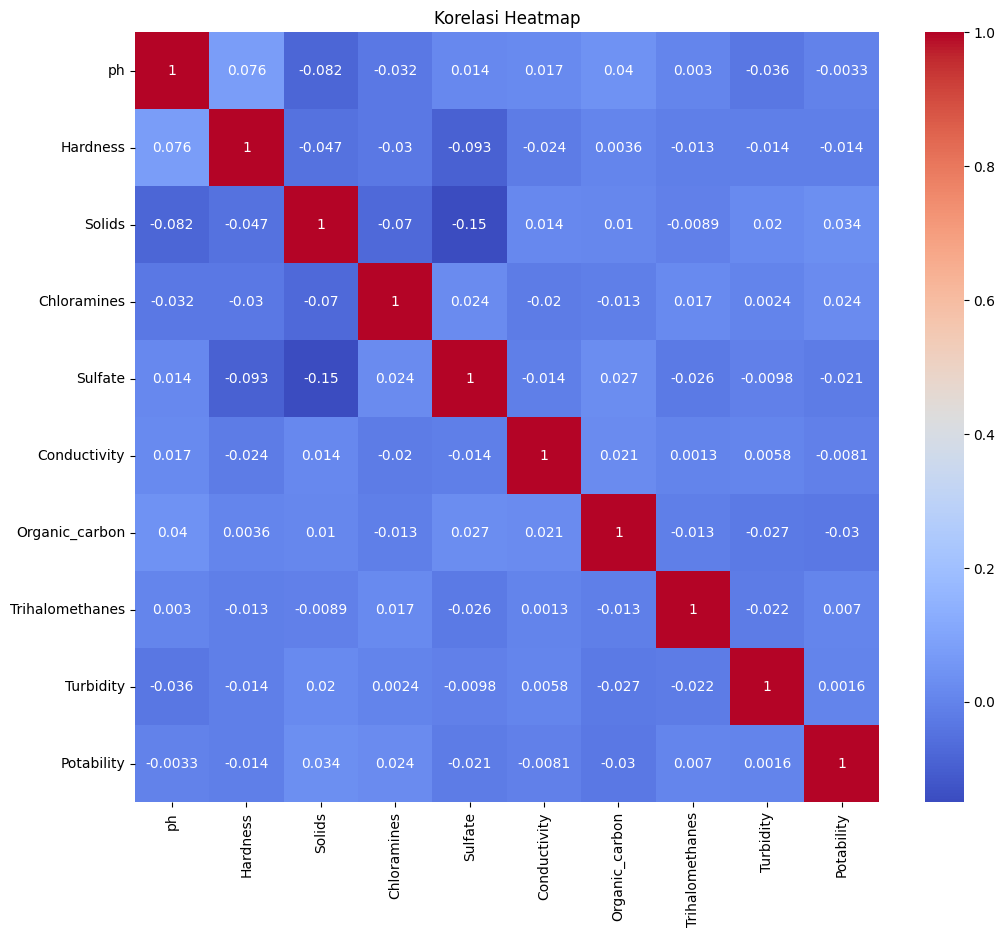

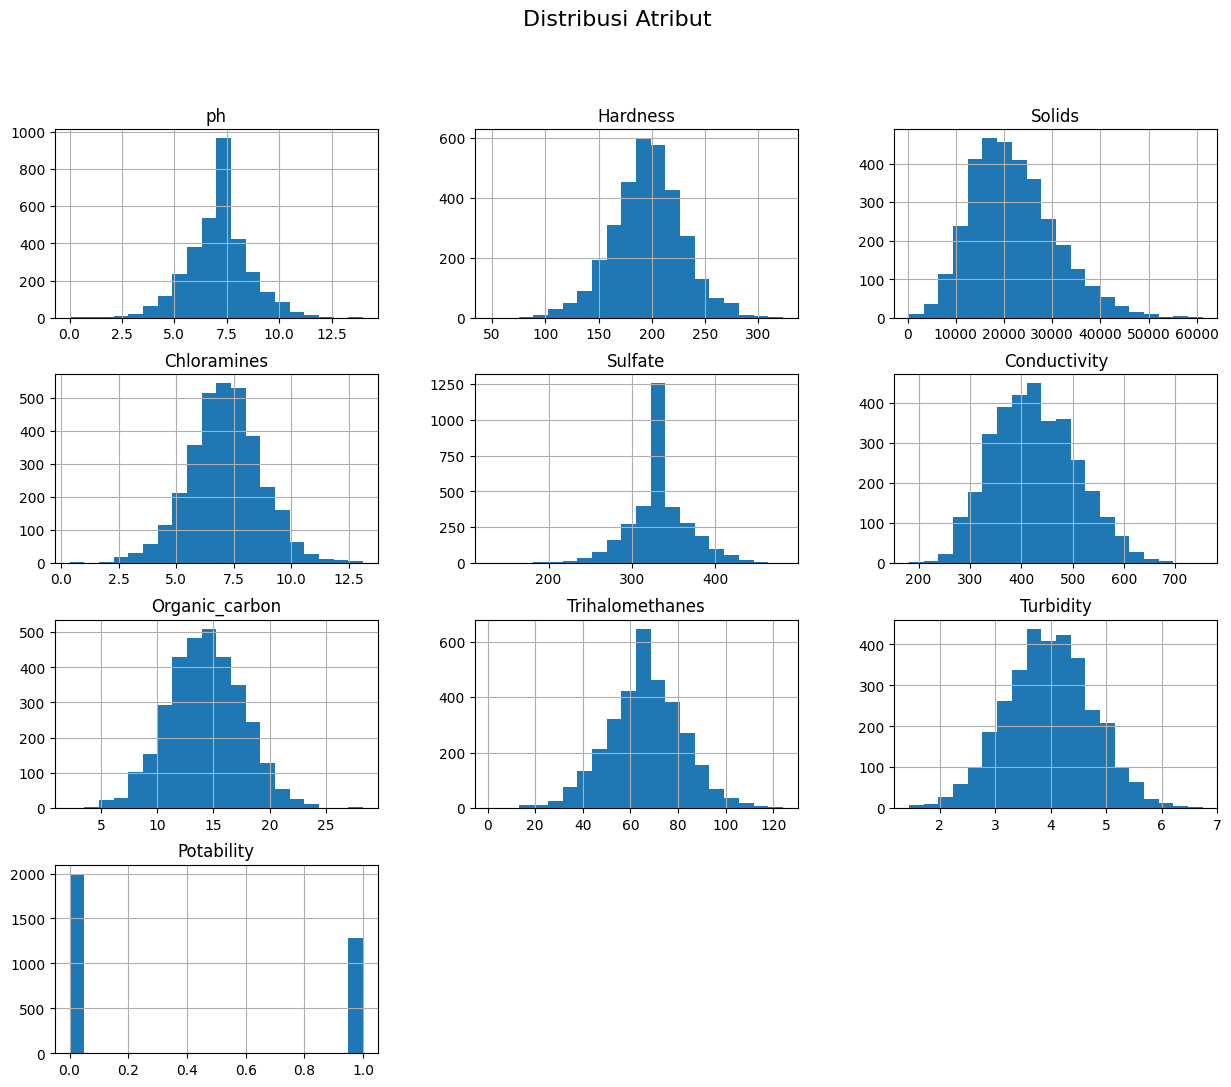

Akurasi Model: 0.6280487804878049

Classification Report:

              precision    recall  f1-score     support
0              0.628049  1.000000  0.771536  412.000000
1              1.000000  0.000000  0.000000  244.000000
accuracy       0.628049  0.628049  0.628049    0.628049
macro avg      0.814024  0.500000  0.385768  656.000000
weighted avg   0.766396  0.628049  0.484562  656.000000


In [ ]:
!pip install -q pandas scikit-learn matplotlib seaborn # Install necessary libraries (quietly)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# **Update the file_path to the correct file name.**
file_path = '/content/water_potability.csv'  # Corrected the file name.

water_data = pd.read_csv(file_path) # Read the data from the CSV file

# --- 1. Pembersihan Data & Visualisasi ---
# Imputasi missing values (jika masih ada)
water_data = water_data.fillna(water_data.mean())

# --- Korelasi Heatmap ---
plt.figure(figsize=(12, 10))
sns.heatmap(water_data.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Heatmap')
plt.show()

# --- Distribusi Histogram Plot ---
water_data.hist(figsize=(15, 12), bins=20)
plt.suptitle('Distribusi Atribut', fontsize=16)
plt.show()

# --- 2. Persiapan Data ---
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']
target = 'Potability'

X = water_data[features]
y = water_data[target]

# --- Scaling Data ---
scaler = StandardScaler()
X = scaler.fit_transform(X) # Scale the features

# --- 3. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 4. Bangun Model ---
model = LogisticRegression(max_iter=1000) # Increase max_iter
model.fit(X_train, y_train)

# --- 5. Evaluasi Model ---
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report, handling zero division
report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=1)

# Convert the dictionary to a Pandas DataFrame
report_df = pd.DataFrame(report_dict).transpose()

print(f"Akurasi Model: {accuracy}")
print("\nClassification Report:\n")
print(report_df) # Print the DataFrame

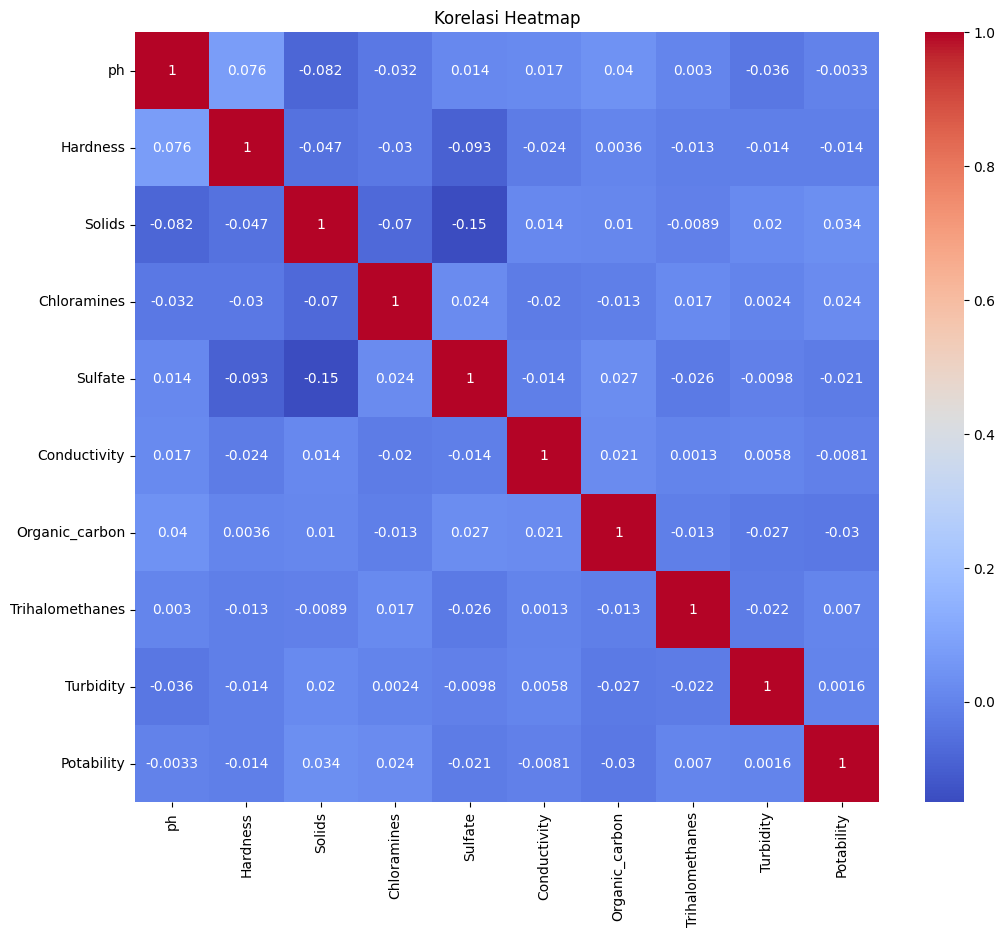

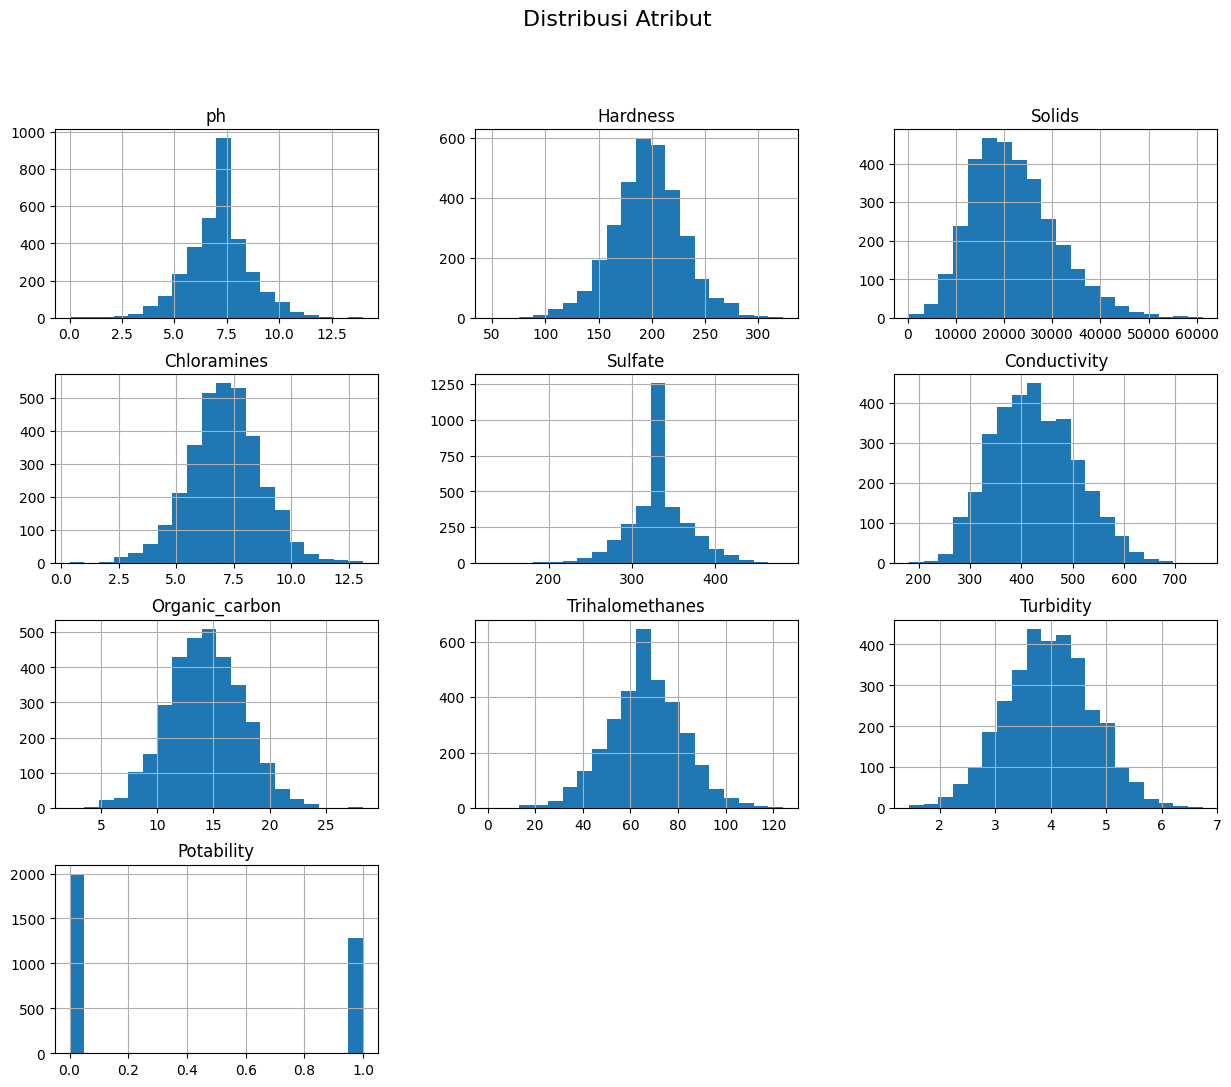

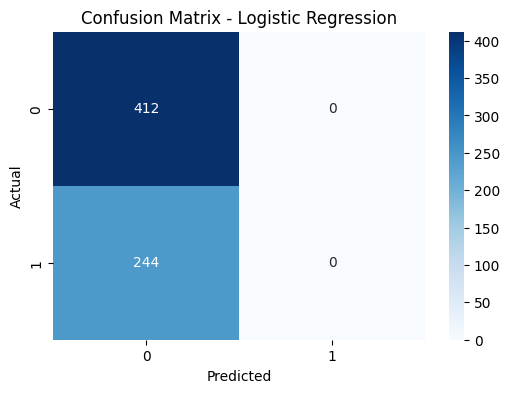

--- Logistic Regression ---
Akurasi: 0.6280487804878049

Classification Report:
               precision    recall  f1-score     support
0              0.628049  1.000000  0.771536  412.000000
1              1.000000  0.000000  0.000000  244.000000
accuracy       0.628049  0.628049  0.628049    0.628049
macro avg      0.814024  0.500000  0.385768  656.000000
weighted avg   0.766396  0.628049  0.484562  656.000000




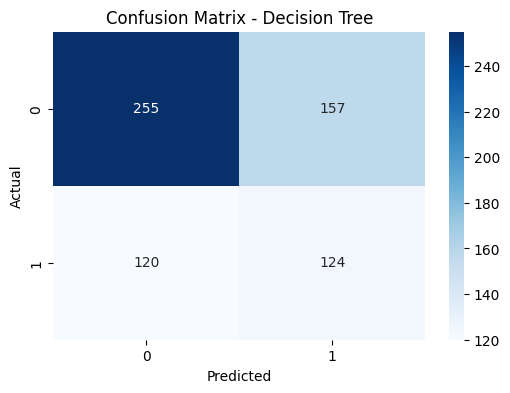

--- Decision Tree ---
Akurasi: 0.5777439024390244

Classification Report:
               precision    recall  f1-score     support
0              0.680000  0.618932  0.648030  412.000000
1              0.441281  0.508197  0.472381  244.000000
accuracy       0.577744  0.577744  0.577744    0.577744
macro avg      0.560641  0.563564  0.560206  656.000000
weighted avg   0.591208  0.577744  0.582697  656.000000




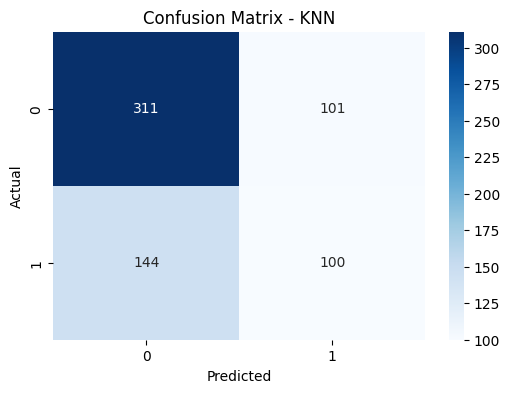

--- KNN ---
Akurasi: 0.6265243902439024

Classification Report:
               precision    recall  f1-score     support
0              0.683516  0.754854  0.717416  412.000000
1              0.497512  0.409836  0.449438  244.000000
accuracy       0.626524  0.626524  0.626524    0.626524
macro avg      0.590514  0.582345  0.583427  656.000000
weighted avg   0.614332  0.626524  0.617742  656.000000




In [ ]:
!pip install -q pandas scikit-learn matplotlib seaborn # Install necessary libraries (quietly)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# **Update the file_path to the correct file name.**
file_path = '/content/water_potability.csv'  # Corrected the file name.

water_data = pd.read_csv(file_path) # Read the data from the CSV file

# --- 1. Pembersihan Data & Visualisasi ---
# Imputasi missing values (jika masih ada)
water_data = water_data.fillna(water_data.mean())

# --- Korelasi Heatmap ---
plt.figure(figsize=(12, 10))
sns.heatmap(water_data.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Heatmap')
plt.show()

# --- Distribusi Histogram Plot ---
water_data.hist(figsize=(15, 12), bins=20)
plt.suptitle('Distribusi Atribut', fontsize=16)
plt.show()

# --- 2. Persiapan Data ---
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']
target = 'Potability'

X = water_data[features]
y = water_data[target]

# --- Scaling Data ---
scaler = StandardScaler()
X = scaler.fit_transform(X) # Scale the features

# --- 3. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 4. Bangun & Evaluasi Model ---
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
    report_df = pd.DataFrame(report).transpose()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"--- {model_name} ---")
    print(f"Akurasi: {accuracy}")
    print("\nClassification Report:\n", report_df)
    print("\n")